In [1]:
import copy
import math
import struct
from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import csv
from scipy.interpolate import interp1d
from scipy.stats import pearsonr, mode
from scipy.signal import savgol_filter
import xgboost as xgb
import sklearn
import copy
import warnings

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from scipy.ndimage import gaussian_filter1d
import struct

addressPrefix='C:/Users/sorush.omidvar/Google Drive/Documents/Educational/TAMU/Research/CGM Dataset/Hoover/'
if not os.path.exists(addressPrefix):
    addressPrefix='C:/GDrive/Documents/Educational/TAMU/Research/CGM Dataset/Hoover/'
pd.options.mode.chained_assignment = None  # default='warn'
plt.style.use({'figure.facecolor':'white'})


import multiprocessing
from joblib import Parallel, delayed

num_cores = multiprocessing.cpu_count()



# import warnings
# warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)

# def dfCompactor(df):
#     df['Date']=df['Date'].astype(int)
#     df['Time']=df['Time']*1000
#     df['Time']=df['Time'].astype(int)
#     df.rename(columns={"Time": "Time[ms]"})
#
#     df['GyroX']=df['GyroX'].astype(float)
#     df['GyroX']=df['GyroX']*1000*1000
#     df['GyroX']=df['GyroX'].astype(int)
#     df.rename(columns={"GyroX": "GyroX[microD/s]"})
#
#     df['GyroY']=df['GyroY'].astype(float)
#     df['GyroY']=df['GyroY']*1000*1000
#     df['GyroY']=df['GyroY'].astype(int)
#     df.rename(columns={"GyroY": "GyroY[microD/s]"})
#
#     df['GyroZ']=df['GyroZ'].astype(float)
#     df['GyroZ']=df['GyroZ']*1000*1000
#     df['GyroZ']=df['GyroZ'].astype(int)
#     df.rename(columns={"GyroZ": "GyroZ[microD/s]"})
#
#     df['AccelX']=df['AccelX'].astype(float)
#     df['AccelX']=df['AccelX']*1000*1000
#     df['AccelX']=df['AccelX'].astype(int)
#     df.rename(columns={"AccelX": "AccelX[microm/s2]"})
#
#     df['AccelY']=df['AccelY'].astype(float)
#     df['AccelY']=df['AccelY']*1000*1000
#     df['AccelY']=df['AccelY'].astype(int)
#     df.rename(columns={"AccelY": "AccelY[microm/s2]"})
#
#     df['AccelZ']=df['AccelZ'].astype(float)
#     df['AccelZ']=df['AccelZ']*1000*1000
#     df['AccelZ']=df['AccelZ'].astype(int)
#     df.rename(columns={"AccelZ": "AccelZ[microm/s2]"})
#
#     return df
#
# def dfOrganizer(df):
#     df.columns.values[2]='TimeStamp'
#
#     df.columns.values[8]='GyroX'
#     df.columns.values[9]='GyroY'
#     df.columns.values[10]='GyroZ'
#
#     df.columns.values[11]='AccelX'
#     df.columns.values[12]='AccelY'
#     df.columns.values[13]='AccelZ'
#
#     df = df.filter(['Name','TimeStamp','GyroX','GyroY','GyroZ','AccelX','AccelY','AccelZ'])
#     df['TimeStamp'] = df['TimeStamp'].astype(float)
#     df['TimeStamp']=df['TimeStamp']-1000*3600*4 #fixing the timezone
#
#     df.insert(2,'Date',float('nan'))
#     df.insert(3,'Time',float('nan'))
#
#     df['Date']=pd.to_datetime(df['TimeStamp'],unit='ms')
#     df['Time']=pd.to_datetime(df['TimeStamp'],unit='ms')
#     df['Date']=df['Date'].dt.dayofyear
#     df['Time']=df['Time'].dt.hour*3600+df['Time'].dt.minute*60+df['Time'].dt.second+df['Time'].dt.microsecond*0.001*0.001
#
#     df.drop(columns=['TimeStamp'],inplace=True)
#     return df
#
# def csvReader(addressPrefix):
#     dataFiles=[]
#     for root, dirs, files in os.walk(addressPrefix, topdown=False):
#        for name in files:
#            if '.csv' in name:
#                dataFiles.append([os.path.join(root,name)])
#     for counter,element in enumerate(dataFiles):
#         print(element)
#         rows = []
#         with open(element[0], 'r') as csvfile:
#             csvreader = csv.reader(csvfile,delimiter = "\t")
#             next(csvreader) #skipping the first junk line
#             headers = next(csvreader) #column titles
#             while '' in headers:
#                 headers.remove("")
#             if len(headers)!=17:
#                 continue
#             next(csvreader) #skipping the units
#             for row in csvreader:
#                 rows.append(row)
#         df = pd.DataFrame(rows,columns=headers)
#         participantName=element[0]
#         participantName=participantName[participantName.find('CSV1')+5:participantName.find('CSV1')+10]
#         df.insert(0,'Name',participantName)
#
#         df=dfOrganizer(df)
#         df=dfCompactor(df)
#
#         if counter==0:
#             dfTotal=df
#         else:
#             frames=[dfTotal,df]
#             dfTotal=pd.concat(frames)
#
#         # if counter==1:
#         #     break
#     dfTotal.sort_values(by=['Name', 'Date','Time'],inplace=True)
#     return dfTotal
#
# def preProcessor(dfTotal,R):
#     columns=dfTotal.columns.values
#     names=dfTotal['Name'].tolist()
#     names=list(set(names))
#
#     dfProc=pd.DataFrame([],columns=columns)
#     for counter,name in enumerate(names):
#         print(name, (counter+1)/len(names))
#         df=dfTotal[dfTotal['Name']==name]
#         for column in columns:
#             if column!='Time' and column!='Date' and column!='Name':
#                 df[column]=list(gaussian_filter1d(df[column].tolist(),sigma=R))
#             df['GyroX']=df['GyroX'].astype(float)
#
#         df['GyroX']=df['GyroX'].astype(int)
#         df['GyroY']=df['GyroY'].astype(int)
#         df['GyroZ']=df['GyroZ'].astype(int)
#         df['AccelX']=df['AccelX'].astype(int)
#         df['AccelY']=df['AccelY'].astype(int)
#         df['AccelZ']=df['AccelZ'].astype(int)
#
#         frames=[dfProc,df]
#         dfProc=pd.concat(frames)
#         nameIndex = dfTotal[(dfTotal.Name == name)].index
#         dfTotal.drop(nameIndex,inplace=True)
#     return dfProc
#
# def funcCaller(addressPrefix):
#     if os.path.exists(os.path.join(addressPrefix,'RawData.csv')):
#         dfRaw=pd.read_csv(os.path.join(addressPrefix,'RawData.csv'))
#     else:
#         dfRaw=csvReader(os.path.join(addressPrefix,'CSV1'))
#         dfRaw.to_csv(os.path.join(addressPrefix,'RawData.csv'),index=False)
#     names=dfRaw['Name'].tolist()
#     names=list(set(names))
#     print('Total particpant number=',len(names))
#
#     if os.path.exists(os.path.join(addressPrefix,'FilteredData.csv')):
#         dfProcessed=pd.read_csv(os.path.join(addressPrefix,'FilteredData.csv'))
#     else:
#         dfProcessed=preProcessor(dfRaw,R=3)
#         dfProcessed.to_csv(os.path.join(addressPrefix,'FilteredData.csv'),index=False)
#     return dfProcessed
#
# dfTotal=funcCaller(addressPrefix)

In [ ]:
def pdFromatter(df):
    for counter in range(len(df)):
        tempStr=df.iloc[counter,1]
        tempVal=int(tempStr[0:2])*3600+int(tempStr[3:5])*60+int(tempStr[6:8])
        tempVal*=1000
        df.iloc[counter,1]=tempVal

        tempStr=df.iloc[counter,2]
        tempVal=int(tempStr[0:2])*3600+int(tempStr[3:5])*60+int(tempStr[6:8])
        tempVal*=1000
        df.iloc[counter,2]=tempVal
        if df.iloc[counter,1]>df.iloc[counter,2]:
            df.iloc[counter,2]+=24*3600*1000
    df.sort_values(by=['Name','Start','End'],inplace=True)

    return df

def labelReader(addressPrefix):
    labelFiles=[]
    for root, dirs, files in os.walk(addressPrefix, topdown=False):
       for name in files:
           if '.txt' in name:
               labelFiles.append([os.path.join(root,name),name])
    mealTime=[]
    sensorTiming=[]
    for element in labelFiles:
        nameTemp=element[1]
        nameTemp=nameTemp[:nameTemp.find('-events')]
        with open(element[0], 'r+') as txtfile:
            fileData = txtfile.read()
            fileData=fileData.splitlines()
            while '' in fileData:
                fileData.remove('')
            tempStart=fileData[0]
            tempStart=tempStart.split()
            tempStart=tempStart[2]

            tempEnd=fileData[-1]
            tempEnd=tempEnd.split()
            tempEnd=tempEnd[2]

            sensorTiming.append([nameTemp,tempStart,tempEnd])
            for counter in range(1,len(fileData)-1):
                tempStr=fileData[counter]
                tempStr=tempStr.split()
                mealTime.append([nameTemp,tempStr[1],tempStr[2]])

    dfMeal=pd.DataFrame(mealTime,columns=['Name','Start','End'])
    dfMeal=pdFromatter(dfMeal)

    dfTime=pd.DataFrame(sensorTiming,columns=['Name','Start','End'])
    dfTime=pdFromatter(dfTime)

    return dfMeal,dfTime

def shimmerReader(element):
    nameTemp=element[1]
    dataList=[]
    tempList=[]
    with open(element[0], mode='rb') as txtfile:
        fileData = txtfile.read()
        for i in range(int(len(fileData)/4)):
            if i%6==0 and i!=0:
                tempList.append(nameTemp)
                dataList.append(tempList)
                tempList=[]
            tempVal=fileData[i*4:(i+1)*4]
            tempVal=struct.unpack('f',tempVal)
            tempVal=tempVal[0]
            tempList.append(tempVal)
    txtfile.close()

    dfSensor=pd.DataFrame(dataList,columns=[ 'X','Y','Z','Yaw','Pitch','Roll','Name'])
    dfSensor=dfSensor[['Name','X','Y','Z','Yaw','Pitch','Roll']]
    dfSensor.to_csv(r'C:\GitHub\mamad.csv')
    del dataList
    return dfSensor

def timeFinder(dfSensor,dfTime):
    dfSensor.insert(1,'Time',float('nan'))
    name=dfSensor['Name'].tolist()
    name=name[0]
    dfTemp=dfTime[dfTime['Name']==name]

    if len(dfTemp)>1:
        print('More than one event file for:',name)
        return
    elif len(dfTemp)==0:
        print('No event file for:',name)
        return
    startTemp=dfTemp['Start'].tolist()
    endTemp=dfTemp['End'].tolist()
    tempTimeStamp=np.linspace(startTemp,endTemp,num=len(dfSensor))
    dfSensor['Time']=tempTimeStamp
    return dfSensor

def featureExtractor(df):
    windowLength=60*1000
    featureData=[]
    name=df['Name'].tolist()
    name=name[0]
    dfName=df[df['Name']==name]
    startTime=dfName['Time'].min()
    endTime=startTime+windowLength

    while startTime<24*3600*1000:
        dfTemp=dfName[dfName['Time']>=startTime]
        dfTemp=dfTemp[dfTemp['Time']<endTime]
        if len(dfTemp)>5*15:
            features=[]
            f1=abs(dfTemp['Yaw'].values)+abs(dfTemp['Roll'].values)+abs(dfTemp['Pitch'].values)
            f2=abs(dfTemp['X'].values)+abs(dfTemp['Y'].values)+abs(dfTemp['Z'].values)
            f2+=0.0001
            f1=f1/f2
            f1=np.mean(f1)
            f2=np.mean(f2)
            if np.isnan(f1):
                print('Nan F1 Value')
                continue
            features.append(f1)
            features.append(f2)
            for axe in dfTemp.columns:
                if axe=='Time' or axe=='Name':
                    continue
                tempVal=np.mean(abs(dfTemp[axe].values))
                features.append(tempVal)

                tempVal=np.std(abs(dfTemp[axe].values))
                features.append(tempVal)

                tempVal=np.mean(dfTemp[axe].values)
                features.append(tempVal)

                tempVal=np.std(dfTemp[axe].values)
                features.append(tempVal)
            features.extend([name,startTime,endTime])
            featureData.append(features)
        startTime+=windowLength
        endTime+=windowLength
    return featureData

def labelExtractor(dfMeal,features):
    dataTotal=[]

    for feature in features:
        dataTemp=[]
        windowName=feature[-3]
        windowStart=feature[-2]
        windowEnd=feature[-1]
        dfTemp=dfMeal[dfMeal['Name']==windowName]
        if len(dfTemp)==0:
            print('skipped',windowName)
            break
        eatingFlag=False
        for counter in range(0,len(dfTemp)):
            if dfTemp.iloc[counter,1]<windowEnd and dfTemp.iloc[counter,2]>windowStart:
                eatingFlag=True
                break
        dataTemp.extend(feature[:len(feature)-3])
        dataTemp.extend([windowName,eatingFlag])
        dataTotal.append(dataTemp)

    return dataTotal

def callerFunc(element,dfMeal,dfTime):

    dfSensor=shimmerReader(element)
    dfSensor=timeFinder(dfSensor,dfTime)
    featureData=featureExtractor(dfSensor)
    allData=labelExtractor(dfMeal,featureData)

    return allData

def main(addressPrefix):
    shimmerFiles=[]
    dfMeal,dfTime=labelReader(os.path.join(addressPrefix,'EVENTfiles'))

    for root, dirs, files in os.walk(os.path.join(addressPrefix,'SHMfiles'), topdown=False):
       for name in files:
           if '.shm' in name:
               shimmerFiles.append([os.path.join(root,name),name[:-4]])
    print(num_cores)
    # shimmerFiles=shimmerFiles[0:10]
    allData=Parallel(n_jobs=num_cores)(delayed(callerFunc)(i, dfMeal,dfTime) for i in tqdm(shimmerFiles))

    headers=['f1','f2']
    for counter in range(5,29):
        headers.append(('f'+str(counter)))
    headers.extend(['Name','EatingFlag'])

    allData = [ item for elem in allData for item in elem]
    dfAllData=pd.DataFrame(allData,columns=headers)
    dfAllData.to_csv(os.path.join(addressPrefix,'AllDataParallel.csv'),index=False)
    return dfAllData

dfAllData=main(addressPrefix)

8


  0%|          | 0/354 [00:00<?, ?it/s]

[0.1400893  0.00962205 0.03094056 0.04799437 0.0267622  0.01489717
 0.03527142 0.05163032 0.04250627 0.05614962 0.0402681  0.02078887
 0.0276947  0.02734829 0.04862183 0.0250908  0.0343126  0.03095352
 0.08136944 0.02515343 0.01962071 0.05141469 0.02272931 0.04634326
 0.0185348  0.02389251]
Testing on test dataset:
[[0.88194097 0.07353677]
 [0.02001001 0.02451226]]
Accuracy 91.0 Recall 55.0 Precision 25.0


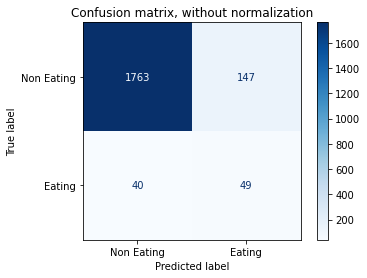

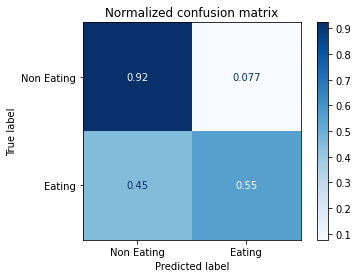

In [79]:
def modelVisualizer(testData,testLabels,modelBest):
    slidingWindowPrediction = modelBest.predict(testData)
    confMatrix=sklearn.metrics.confusion_matrix(testLabels,slidingWindowPrediction,normalize='all')
    accuracy=sklearn.metrics.accuracy_score(testLabels,slidingWindowPrediction)
    recall=sklearn.metrics.recall_score(testLabels,slidingWindowPrediction)
    precision=sklearn.metrics.precision_score(testLabels,slidingWindowPrediction)

    print('Testing on test dataset:')
    print(confMatrix)
    print('Accuracy',np.round(100*accuracy,0),'Recall',np.round(100*recall,0),'Precision',np.round(100*precision,0))

    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(modelBest, testData, testLabels,
                                     display_labels=['Non Eating','Eating'],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()


def xgClassifier(dataList, labelList,randomSeed):
    trainData, testData, trainLabels, testLabels = train_test_split(dataList, labelList, test_size=0.25,random_state=randomSeed)
    trainData, valData, trainLabels, valLabels = train_test_split(trainData, trainLabels, test_size=0.33,random_state=randomSeed)
    oversample = SMOTE()
    trainData,trainLabels = oversample.fit_resample(trainData,trainLabels)
    f1Best=0
    for maxDepth in np.arange(2,7):
        for estimator in np.arange(20,30,200):
            clf = xgb.XGBClassifier(n_estimators=estimator,max_depth=maxDepth,objective = "binary:logistic",
                                    eval_metric = "logloss",use_label_encoder =False,scale_pos_weight=1,random_state=randomSeed)
            clf.fit(trainData, trainLabels)
            slidingWindowPrediction = clf.predict(valData)
            accuracy=sklearn.metrics.accuracy_score(valLabels,slidingWindowPrediction)
            recall=sklearn.metrics.recall_score(valLabels,slidingWindowPrediction)
            precision=sklearn.metrics.precision_score(valLabels,slidingWindowPrediction)
            f1=sklearn.metrics.f1_score(valLabels,slidingWindowPrediction,average='weighted')

            if f1>f1Best:
                f1Best=f1
                maxDepthBest=maxDepth
                estimatorBest=estimator
                accuracyBest=accuracy
                modelBest=clf
                recallBest=recall
                precisionBest=precision
    print(modelBest.feature_importances_)
    modelVisualizer(testData,testLabels,modelBest)

def randomForestClassifier(dataList,labelList,randomSeed):
    trainData, testData, trainLabels, testLabels = train_test_split(dataList, labelList, test_size=0.25,random_state=randomSeed)
    trainData, valData, trainLabels, valLabels = train_test_split(trainData, trainLabels, test_size=0.33,random_state=randomSeed)
    oversample = SMOTE()
    trainData,trainLabels = oversample.fit_resample(trainData,trainLabels)
    f1Best=0
    for treeNum in np.arange(10,100,10):
        for maxDepth in np.arange(3,10):
            clf=RandomForestClassifier(n_estimators=treeNum,criterion='entropy',random_state=0,max_depth=maxDepth)
            clf.fit(trainData,trainLabels)
            slidingWindowPrediction=clf.predict(valData)
            accuracy=sklearn.metrics.accuracy_score(valLabels,slidingWindowPrediction)
            recall=sklearn.metrics.recall_score(valLabels,slidingWindowPrediction)
            precision=sklearn.metrics.precision_score(valLabels,slidingWindowPrediction)
            f1=sklearn.metrics.f1_score(valLabels,slidingWindowPrediction,average='weighted')

            if f1>f1Best:
                f1Best=f1
                maxDepthBest=maxDepth
                treeNumBest=treeNum
                accuracyBest=accuracy
                modelBest=clf
                recallBest=recall
                precisionBest=precision

    modelVisualizer(testData,testLabels,modelBest)

data=pd.read_csv(os.path.join(addressPrefix,'AllDataParallel.csv'))
allLabel=data['EatingFlag'].values
allLabel=np.asarray(allLabel,dtype=int)

data.drop(columns=['Name','EatingFlag'],inplace=True)
allData=data.values
allData=np.asarray(allData,dtype=float)
for axis in range(allData.shape[1]):
    allData[:,axis]-=np.mean(allData[:,axis])
    allData[:,axis]/=np.std(allData[:,axis])

xgClassifier(allData, allLabel,randomSeed=random.randrange(0,100))

In [76]:
from sklearn import preprocessing
print(preprocessing.normalize([[0, 1,2,3,4], [5,6,7,8,9]]))



[[0.         0.18257419 0.36514837 0.54772256 0.73029674]
 [0.31311215 0.37573457 0.438357   0.50097943 0.56360186]]
